In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import impute

In [4]:
data = pd.read_csv('Bias_correction_ucl.csv')
data.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [5]:
data.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

## Prepare dates

In [6]:
data['Date'] = pd.to_datetime(data['Date'])

In [7]:
print(f'{data["Date"][2]} < {data["Date"][25]} -> ({data["Date"][2] < data["Date"][25]})')

2013-06-30 00:00:00 < 2013-07-01 00:00:00 -> (True)


# Missing data

In [8]:
data.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

# Analysis

In [9]:
data = data.sort_values(by='Date')

## Correlations

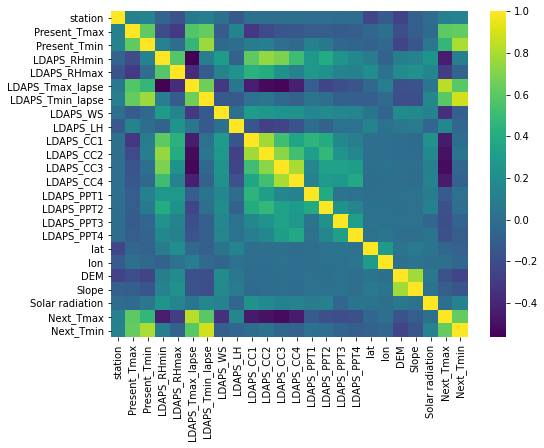

In [10]:
plt.subplots(figsize=(8, 6))
sns.heatmap(data.corr(), cmap='viridis')
plt.show()

## distribution of dates

(array([1550.,    0., 1550.,    0.,  775.,  775.,    0., 1550.,    0.,
        1550.]),
 array([15886. , 16038.2, 16190.4, 16342.6, 16494.8, 16647. , 16799.2,
        16951.4, 17103.6, 17255.8, 17408. ]),
 <BarContainer object of 10 artists>)

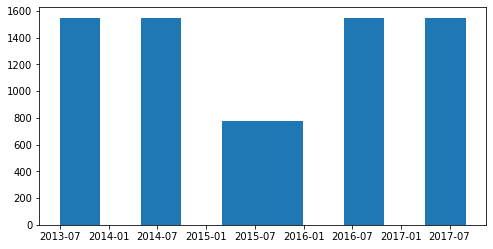

In [11]:
fig = plt.figure(figsize=(8, 4))
plt.hist(data['Date'])

In [12]:
temp = pd.DataFrame({"year": [v.year for v in data['Date']], "date": data['Date']}).dropna()
temp.groupby('year').agg({'date': ["min", "max"]})

date           
              min        max
year                        
2013.0 2013-06-30 2013-08-30
2014.0 2014-06-30 2014-08-30
2015.0 2015-06-30 2015-08-30
2016.0 2016-06-30 2016-08-30
2017.0 2017-06-30 2017-08-30

## check temperatures

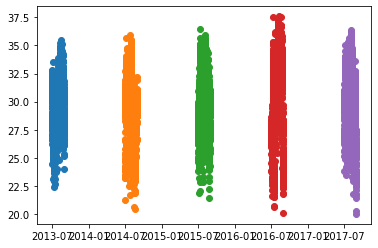

In [13]:
for year in (2013, 2014, 2015, 2016, 2017):
    temp = data[np.array([v.year for v in data['Date']]) == year]
    plt.scatter(temp['Date'], temp['Present_Tmax'], label=f'Present_Tmax:{year}')
plt.show()

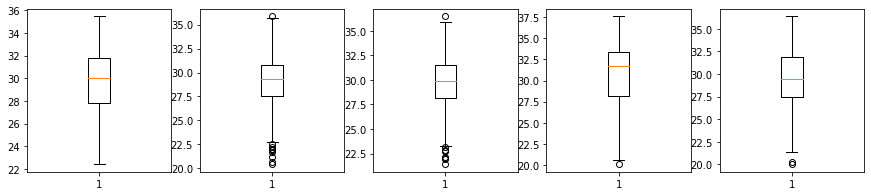

In [14]:
fig, axs = plt.subplots(1, 5, figsize=(15, 3))
for i, year in enumerate((2013, 2014, 2015, 2016, 2017)):
    temp = data[np.array([v.year for v in data['Date']]) == year]

    axs[i].boxplot(temp['Present_Tmax'].dropna())
plt.show()

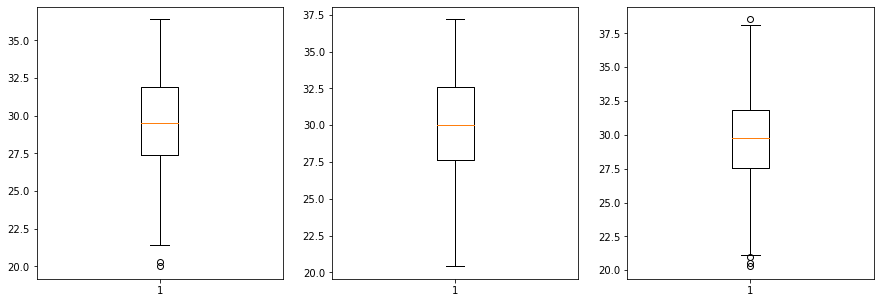

In [15]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].boxplot(temp['Present_Tmax'].dropna())
axs[1].boxplot(temp['Next_Tmax'].dropna())
axs[2].boxplot(temp['LDAPS_Tmax_lapse'].dropna())
plt.show()

/home/viking/Programing-stuff/ml-workshop/venv/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/viking/Programing-stuff/ml-workshop/venv/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/viking/Programing-stuff/ml-workshop/venv/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to us

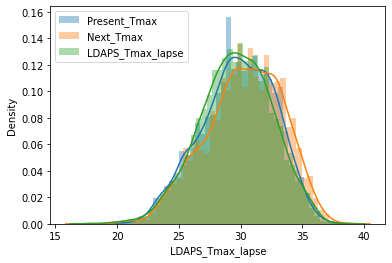

In [16]:
sns.distplot(data['Present_Tmax'], label='Present_Tmax')
sns.distplot(data['Next_Tmax'], label='Next_Tmax')
sns.distplot(data['LDAPS_Tmax_lapse'], label='LDAPS_Tmax_lapse')

plt.legend()
plt.show()

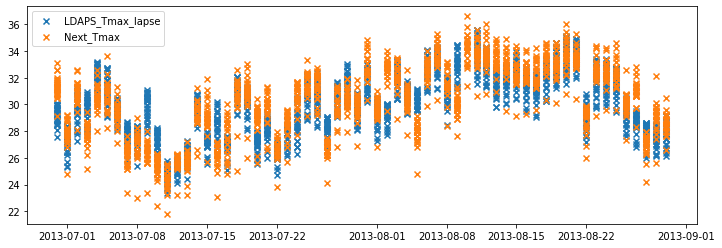

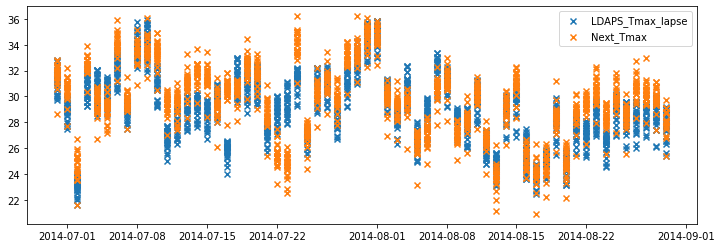

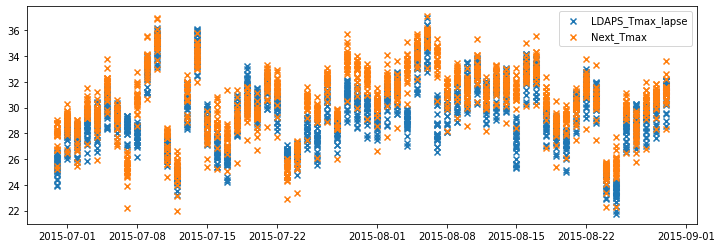

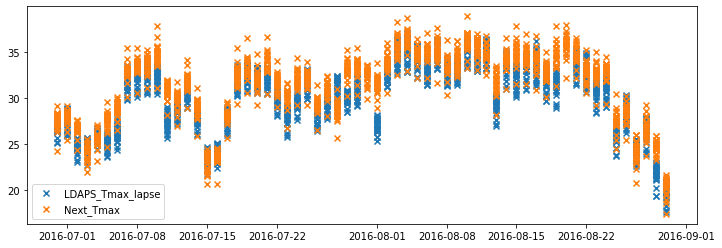

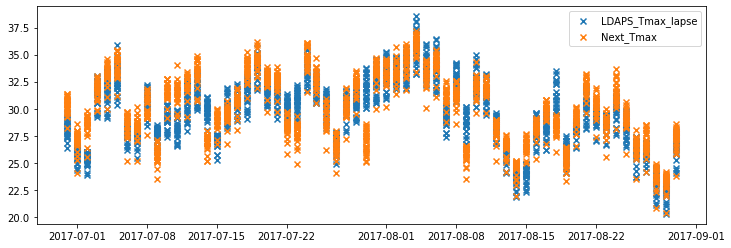

In [17]:
for year in (2013, 2014, 2015, 2016, 2017):
    temp = data[np.array([v.year for v in data['Date']]) == year]
    next_days = temp['Date'] + pd.to_timedelta([1 for _ in temp['Date']], unit='d')

    fig = plt.figure(figsize=(12, 4))
#     plt.plot(temp['Date'], temp['Present_Tmax'], label='Present_Tmax')
#     plt.plot(next_days, temp['LDAPS_Tmax_lapse'], label='LDAPS_Tmax_lapse')
    plt.scatter(temp['Date'], temp['LDAPS_Tmax_lapse'], label='LDAPS_Tmax_lapse', marker='x')

#     plt.plot(next_days, temp['Next_Tmax'], label='Next_Tmax')
    plt.scatter(temp['Date'], temp['Next_Tmax'], label='Next_Tmax', marker='x')

    plt.legend()
    plt.show()

In [18]:
data['station'].dropna().unique()

array([ 1., 25., 24., 23., 22., 21., 20., 18., 17., 16., 15., 14., 19.,
       12., 13.,  3.,  4.,  5.,  6.,  2.,  8.,  9., 10., 11.,  7.])

In [19]:
from cycler import cycler

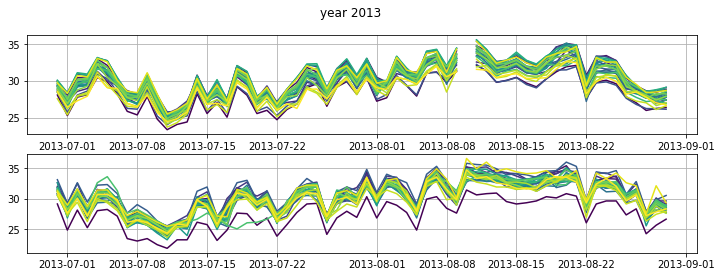

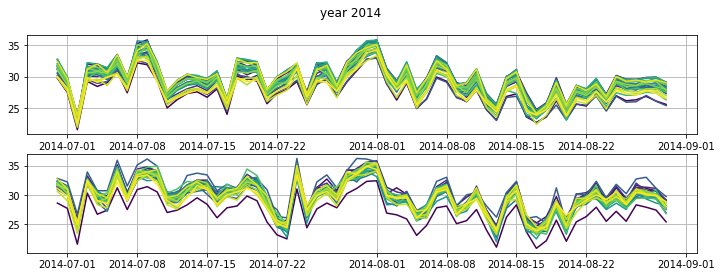

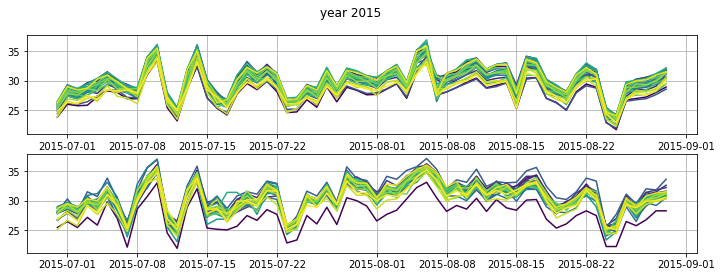

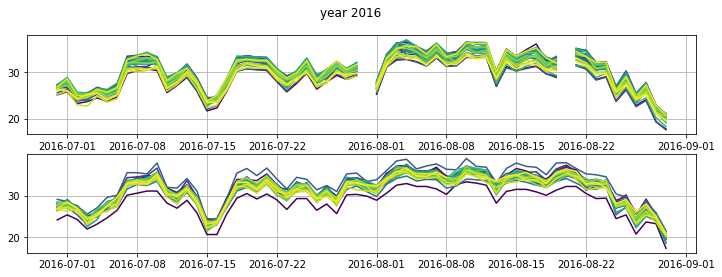

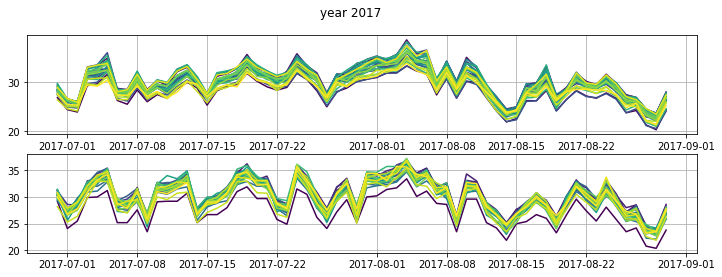

In [37]:
for year in (2013, 2014, 2015, 2016, 2017):
    temp = data[np.array([v.year for v in data['Date']]) == year]
    next_days = temp['Date'] + pd.to_timedelta([1 for _ in temp['Date']], unit='d')
#     fig = plt.figure(figsize=(12, 4))
    fig, axs =  plt.subplots(2, 1, figsize=(12, 4))
    fig.suptitle(f'year {year}')
    
    axs[0].set_prop_cycle(cycler('color', plt.cm.viridis(np.linspace(0, 1, 25))))
    axs[0].grid()
    
    for station_id in data['station'].dropna().unique():
        indices = (temp.station == station_id)

        axs[0].plot(temp['Date'][indices], temp['LDAPS_Tmax_lapse'][indices], label=station_id)#, color=(station_id/25, 0, 0))


    axs[1].set_prop_cycle(cycler('color', plt.cm.viridis(np.linspace(0, 1, 25))))
    axs[1].grid()

    for station_id in data['station'].dropna().unique():
        indices = (temp.station == station_id)
        axs[1].plot(temp['Date'][indices], temp['Next_Tmax'][indices], label=station_id)#, color=(station_id/25, 0, 0))

    plt.show()

## Check cloud cover

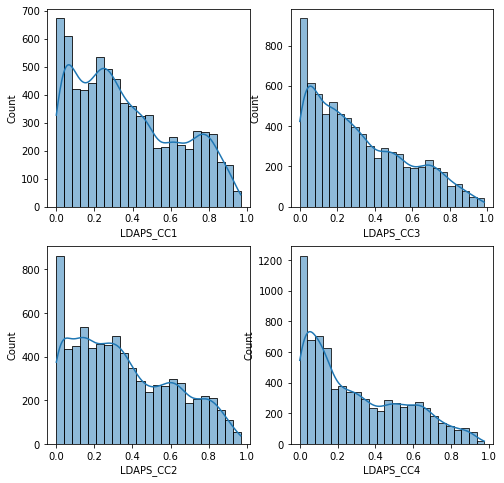

In [21]:
fix, axs = plt.subplots(2, 2, figsize=(8, 8))
sns.histplot(data['LDAPS_CC1'], label='LDAPS_CC1', ax=axs[0, 0], kde=True)
# axs[0, 0].set_title('LDAPS_CC1')
sns.histplot(data['LDAPS_CC2'], label='LDAPS_CC2', ax=axs[1, 0], kde=True)
# axs[1, 0].set_title('LDAPS_CC2')
sns.histplot(data['LDAPS_CC3'], label='LDAPS_CC3', ax=axs[0, 1], kde=True)
# axs[0, 1].set_title('LDAPS_CC3')
sns.histplot(data['LDAPS_CC4'], label='LDAPS_CC4', ax=axs[1, 1], kde=True)
# axs[1, 1].set_title('LDAPS_CC4')

# fix.legend()
plt.show()

## Precipitation

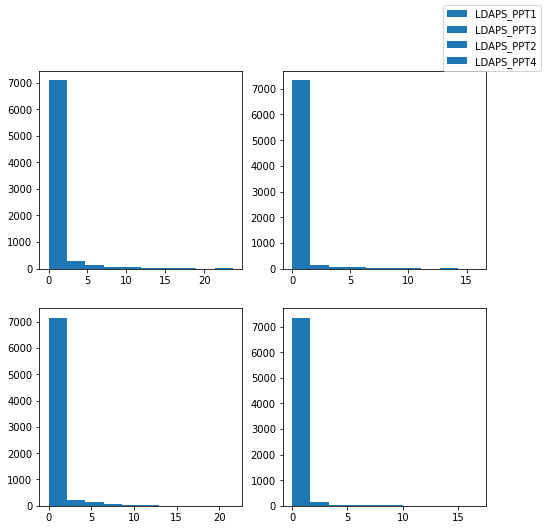

In [36]:
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
axs[0, 0].hist(data['LDAPS_PPT1'], label='LDAPS_PPT1')
axs[1, 0].hist(data['LDAPS_PPT2'], label='LDAPS_PPT2')
axs[0, 1].hist(data['LDAPS_PPT3'], label='LDAPS_PPT3')
axs[1, 1].hist(data['LDAPS_PPT4'], label='LDAPS_PPT4')
fig.legend()
plt.show()